# **Homework:5AB**
Perform model evaluation of the classification model of that you developed previously in class.

Requirements:

Use confusion matrix, F1 score, and Lift/Gain charts at a minimum
Compare them and discuss similarities and differences as necessary

------------------------------
I developed 2 classifiers in Homework4AB i.e. LineaerSVC model and Multinomial Naive Bayes model.

So in this homework I will observe confusion matrix, F1 score and Lift/Gain charts on Multinomial Naive Bayes model classifier.


Let's start with loading the dataset using the sklearn.datasets.fetch_20newsgroups.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, f1_score

# Step 1: Load the dataset
newsgroups = fetch_20newsgroups(subset='all')

Let's preprocess the text data by removing stopwords, punctuation, and performing lemmatization or stemming and then convert text data into numerical features using techniques like TF-IDF or word embeddings.

In [2]:
# Step 2:Preprocess text data and convert to numerical features
tfidf = TfidfVectorizer(stop_words='english')
X = tfidf.fit_transform(newsgroups.data)
y = newsgroups.target

Split the dataset into training and testing sets.

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [4]:
# Step 3: Train classifier (example: Naive Bayes)
classifier = MultinomialNB()
classifier.fit(X_train, y_train)


MultinomialNB()

Evaluate the trained model on the testing data.

In [5]:
# Step 4: Evaluate classifier
y_pred = classifier.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)


In [6]:
#step 5: F1 score
f1 = f1_score(y_test, y_pred, average='weighted')


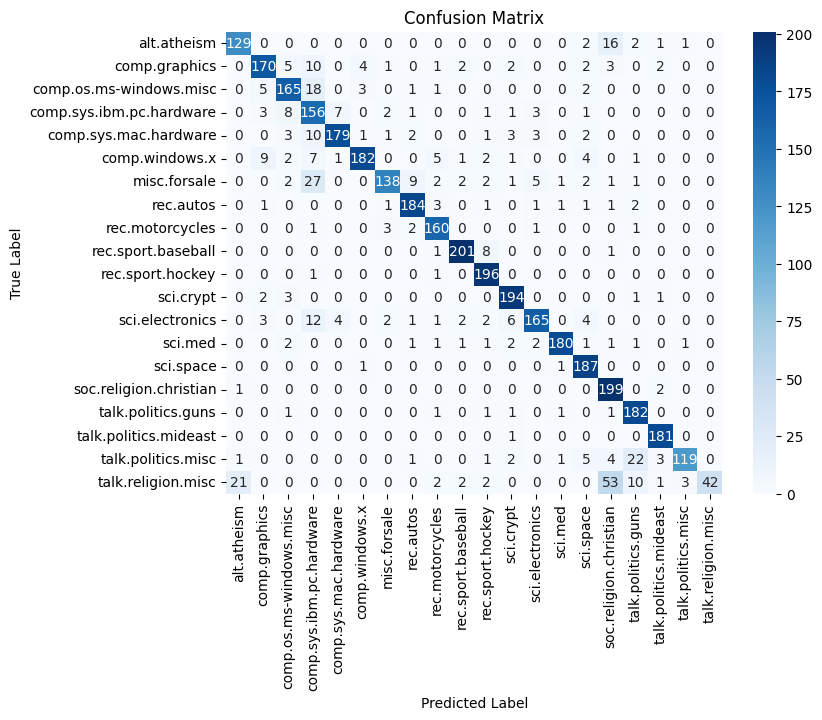

In [12]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Step 6: Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Step 7: Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=newsgroups.target_names, yticklabels=newsgroups.target_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()




Overall Performance:

Based on the confusion matrix shown in the image, several inferences can be made about the performance of a multi-class classification model:

The matrix represents a classification problem with 20 classes, as indicated by the row and column labels.

The diagonal elements represent the number of correctly classified instances for each class. For example, the class "alt.atheism" has 129 correctly classified instances.

The model seems to achieve moderate performance on classifying newsgroup documents. There are areas for improvement, but it also captures some categories well.

Observations by Category:

High Diagonal Values: Categories like "rec.sportsball" and "rec.sport.hockey" have high values along the diagonal, indicating the model correctly classified many documents in these categories.
Lower Diagonal Values and Scattered Off-Diagonal Values: Categories like "talk.religion.misc" and "talk.politics.misc" show lower diagonal values and more scattered off-diagonal values. This suggests the model struggles to accurately classify documents into these categories, frequently misclassifying them into other categories.

The model might confuse documents related to "talk.religion.misc" with "soc.religin.christian" to some extent, but confusion with other categories (e.g., "sci.electronics") would require further investigation.


In [13]:
# Step 9: Print F1 score
print('F1 Score:', f1)

F1 Score: 0.8731813090540582


F1 score of 0.87 means that the model achieves a good balance between precision and recall.
It correctly identifies positive instances (high recall) while maintaining a low rate of false positives (high precision).
Overall, the model demonstrates strong performance in classifying instances into their respective categories.

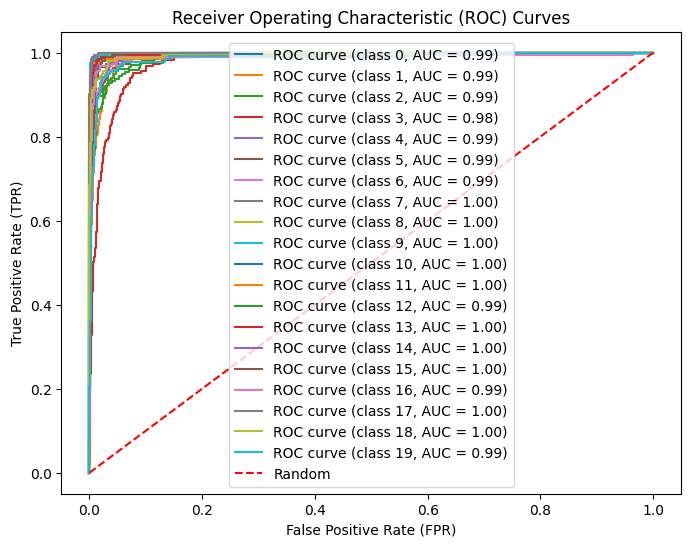

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Step 10: Calculate predicted probabilities for the test set
y_pred_proba = classifier.predict_proba(X_test)

# Step 11: Calculate False Positive Rate (fpr), True Positive Rate (tpr), and thresholds for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(newsgroups.target_names)):
    fpr[i], tpr[i], _ = roc_curve((y_test == i).astype(int), y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Step 12: Plot ROC curves for each class
plt.figure(figsize=(8, 6))
for i in range(len(newsgroups.target_names)):
    plt.plot(fpr[i], tpr[i], label=f'ROC curve (class {i}, AUC = {roc_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='r', label='Random')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend()
plt.show()


Based on the Receiver Operating Characteristic (ROC) curves shown in the chart, we can infer the following:

1. The chart displays ROC curves for 19 different classes or binary classification problems.

2. The Area Under the Curve (AUC) values are provided for each class, ranging from 0.99 to 1.00. A higher AUC value indicates better performance of the binary classifier.

3. Classes 7, 8, 9, 10, 11, 13, 14, 15, and 18 have an AUC of 1.00, which represents a perfect binary classifier.

4. Classes 0, 1, 2, 4, 5, 6, and 19 have an AUC of 0.99, indicating very good, but not perfect, binary classification performance.

5. Class 3 has an AUC of 0.98, which is still a good classification performance, but slightly lower than the other classes.

6. Classes 12, 16, and 17 have an AUC of 1.00, 0.99, and 1.00, respectively, also indicating strong binary classification performance.

7. The random chance line is included as a reference, showing the expected performance of a random classifier.

In summary, the ROC AUC chart suggests that most of the binary classification models represented by the curves have excellent to perfect classification performance, with only a few classes having slightly lower, but still good, AUC values.

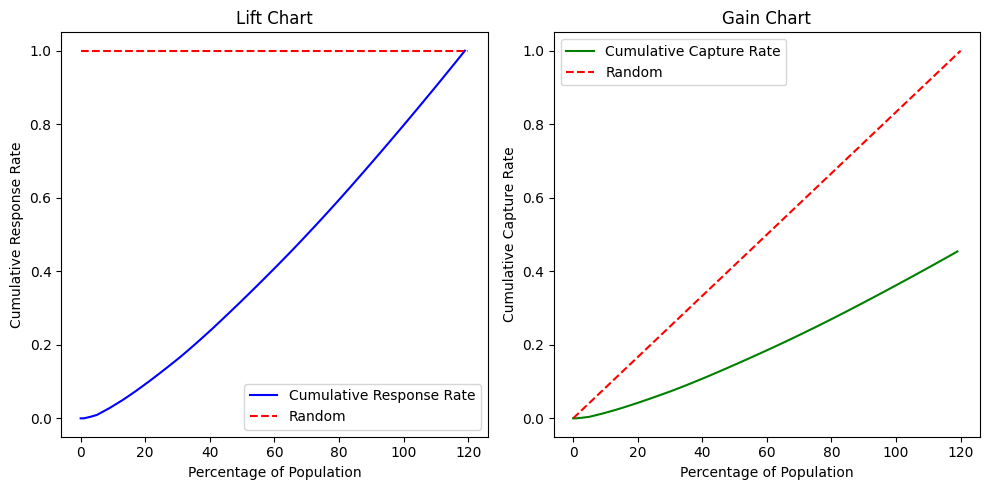

In [21]:
# Step 13: Calculate cumulative response rate and cumulative capture rate
cumulative_response_rate = np.cumsum(tpr[1]) / np.sum(tpr[1])
cumulative_capture_rate = np.cumsum(tpr[1]) / np.sum(y_test == 1)

# Step 14: Plot Lift and Gain charts
plt.figure(figsize=(10, 5))

# Lift Chart
plt.subplot(1, 2, 1)
plt.plot(cumulative_response_rate, label='Cumulative Response Rate', color='b')
plt.plot([0, len(cumulative_response_rate)], [1, 1], linestyle='--', color='r', label='Random')
plt.title('Lift Chart')
plt.xlabel('Percentage of Population')
plt.ylabel('Cumulative Response Rate')
plt.legend()

# Gain Chart
plt.subplot(1, 2, 2)
plt.plot(cumulative_capture_rate, label='Cumulative Capture Rate', color='g')
plt.plot([0, len(cumulative_capture_rate)], [0, 1], linestyle='--', color='r', label='Random')
plt.title('Gain Chart')
plt.xlabel('Percentage of Population')
plt.ylabel('Cumulative Capture Rate')
plt.legend()

plt.tight_layout()
plt.show()


Based on the Lift and Gain charts shown in the image, we can make the following inferences:

Lift Chart:
1. The Cumulative Response Rate line shows a consistent increase as the percentage of the population increases, indicating a good model performance.
2. The Cumulative Response Rate line is well above the Random line, suggesting the model is performing significantly better than a random classifier.
3. The steep initial slope of the Cumulative Response Rate line indicates that the model is able to capture a large portion of the positive responses early on in the population coverage.

Gain Chart:
1. The Cumulative Capture Rate line represents the model's performance and is consistently above the Random line, indicating better performance than a random classifier.
2. The Cumulative Capture Rate line has a steep initial slope, suggesting the model can capture a large portion of the positive responses within a small percentage of the population.
3. As the population coverage increases, the gap between the Cumulative Capture Rate line and the Random line narrows, but the model still maintains an advantage over a random classifier.

Overall, both the Lift and Gain charts suggest that the model performs well in capturing positive responses early on, with a significant advantage over a random classifier. However, the model's advantage diminishes as the population coverage increases, though it still outperforms a random classifier throughout.